In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  

from sklearn import tree
from os import system

In [3]:
myDF=pd.read_csv('bank-full.csv')
myDF.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [4]:
myDF.tail(10)

age           job   marital  education default  balance housing loan  \
45201   53    management   married   tertiary      no      583      no   no   
45202   34        admin.    single  secondary      no      557      no   no   
45203   23       student    single   tertiary      no      113      no   no   
45204   73       retired   married  secondary      no     2850      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45201   cellular   17   nov       226         1    184         4  success   
45202   cellular   17   nov       224         1     -1         0  unknown   
45203   cellular   17   nov       266         1     -1         0  unknown   
45204   cellular   17   nov       300         1     40         8  failure   
45205   cellular   17   nov       386         2     -1         0  unknown   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45201    yes  
45202    yes  
45203    yes  
45204    yes  
45205    yes  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [5]:
myDF.shape

(45211, 17)

In [6]:
myDF.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [7]:
myDF.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(myDF)

Total  Percent
Target         0      0.0
loan           0      0.0
job            0      0.0
marital        0      0.0
education      0      0.0
default        0      0.0
balance        0      0.0
housing        0      0.0
contact        0      0.0
poutcome       0      0.0
day            0      0.0
month          0      0.0
duration       0      0.0
campaign       0      0.0
pdays          0      0.0
previous       0      0.0
age            0      0.0

In [9]:
myDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#Convert the columns with an 'object' datatype into categorical variables

for i in myDF.columns:
    if myDF[i].dtype=='object':
        myDF[i]=pd.Categorical(myDF[i])
        
myDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


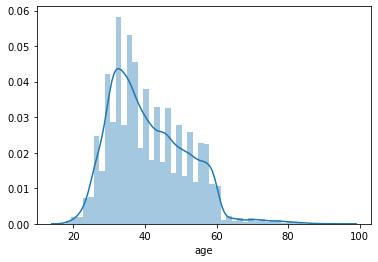

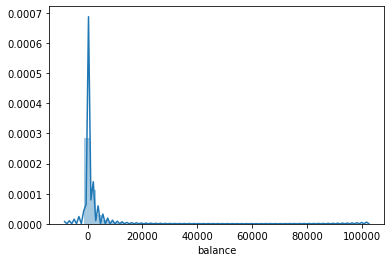

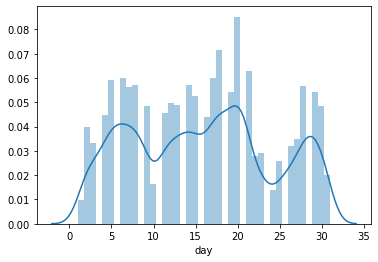

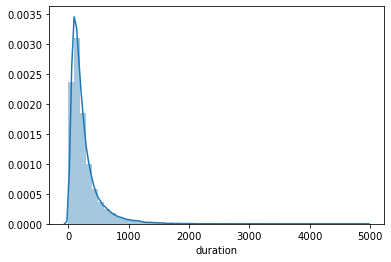

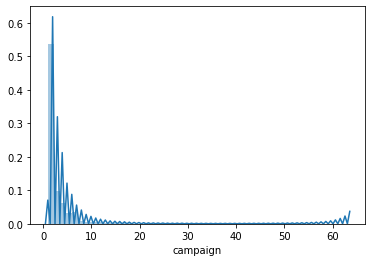

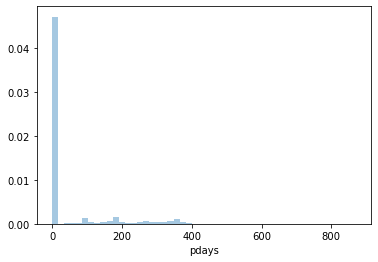

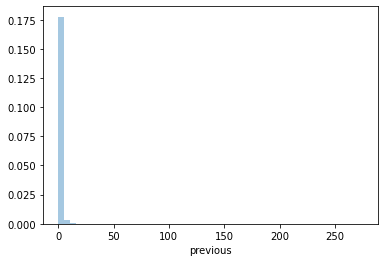

In [11]:
# distplot for continous columns



for i in myDF.columns:
    if myDF[i].dtype =='int64':
        sns.distplot(myDF[i])
        plt.show()
        

    

33.0
48.0
15.0
10.5 70.5


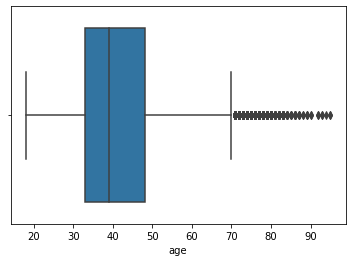

In [12]:
sns.boxplot(data=myDF,x=myDF['age']);
Q1=myDF['age'].quantile(0.25)
Q3=myDF['age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker_age = Q1-(1.5 * IQR)
Upper_Whisker_age = Q3 + (1.5*IQR)
print(Lower_Whisker_age, Upper_Whisker_age)

In [13]:
#Getting the number of records above the upper whisker age of 70.5 and with job =unknown. These can be changed to "retired"
#='retired'
myDF.loc[(myDF['age']>Upper_Whisker_age) & (myDF['job']=='unknown'),'job']='retired'


In [14]:
myDF['pdays'].value_counts(normalize=True)

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64

Insights: 
Most the pdays value is -1 and the rest have extremely low percentages. Changing this to a boolean category 'contacted_before' 

In [15]:
myDF['contacted_before']=np.where(myDF['pdays']>0,'Yes','No')
myDF.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5   may       261         1     -1         0  unknown     no   
1  unknown    5   may       151         1     -1         0  unknown     no   
2  unknown    5   may        76         1     -1         0  unknown     no   
3  unknown    5   may        92         1     -1         0  unknown     no   
4  unknown    5   may       198         1     -1         0  unknown     no   

  contacted_before  
0               No  
1               No  
2               No  
3               No  
4               No

In [16]:

myDF['contacted_before']=pd.Categorical(myDF['contacted_before'])
myDF['contacted_before'].value_counts(normalize=True)

#Dropping the pdays column since the data is represented in the contacted_before column
myDF.drop(['pdays'],axis=1,inplace=True)

In [17]:
myDF['previous'].value_counts(normalize=True)

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
24     0.000111
27     0.000111
29     0.000088
25     0.000088
21     0.000088
30     0.000066
28     0.000044
26     0.000044
37     0.000044
38     0.000044
55     0.000022
40     0.000022
35     0.000022
58     0.000022
51     0.000022
41     0.000022
32     0.000022
275    0.000022
Name: previous, dtype: float64

In [18]:
myDF[myDF['previous']==275]

age         job  marital education default  balance housing loan  \
29182   40  management  married  tertiary      no      543     yes   no   

        contact  day month  duration  campaign  previous poutcome Target  \
29182  cellular    2   feb       349         2       275    other     no   

      contacted_before  
29182              Yes

#### Value of 275 for "previous" is an extreme outlier and seems wrong. Dropping the row

In [19]:
myDF.drop(myDF.index[29182], inplace=True)
myDF[myDF['previous']==275]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, previous, poutcome, Target, contacted_before]
Index: []

In [20]:
#changing Previous to categorical previous_contact Yes or no. 
myDF['previous_contact']=np.where(myDF['previous']>0,'Yes','No')
myDF.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  previous poutcome Target  \
0  unknown    5   may       261         1         0  unknown     no   
1  unknown    5   may       151         1         0  unknown     no   
2  unknown    5   may        76         1         0  unknown     no   
3  unknown    5   may        92         1         0  unknown     no   
4  unknown    5   may       198         1         0  unknown     no   

  contacted_before previous_contact  
0               No               No  
1               No               No  
2               No               No  
3               No               No  
4               No               No

In [21]:
myDF['previous_contact']=pd.Categorical(myDF['previous_contact'])
myDF['previous_contact'].value_counts(normalize=True)

#Dropping the pdays column since the data is represented in the contacted_before column
myDF.drop(['previous'],axis=1,inplace=True)

In [22]:
myDF['campaign'].value_counts(normalize=True)

1     0.388056
2     0.276576
3     0.122119
4     0.077903
5     0.039018
6     0.028556
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
23    0.000487
25    0.000487
24    0.000442
28    0.000354
29    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
43    0.000066
38    0.000066
41    0.000044
50    0.000044
37    0.000044
51    0.000022
55    0.000022
46    0.000022
58    0.000022
44    0.000022
39    0.000022
63    0.000022
Name: campaign, dtype: float64

1.0
3.0
2.0
-2.0 6.0


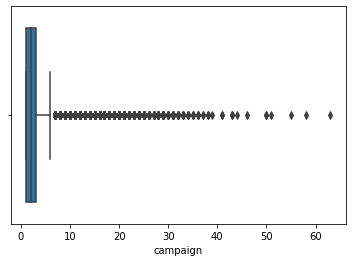

In [23]:
sns.boxplot(data=myDF,x=myDF['campaign']);
Q1=myDF['campaign'].quantile(0.25)
Q3=myDF['campaign'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1-(1.5 * IQR)
Upper_Whisker = Q3 + (1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

In [24]:
#myDF=myDF[myDF['campaign']<Upper_Whisker]

#Instead of a numerical, grouping the Campaign calls into 3 groups. Called less than 4 times, 4 to 6 times and greater than 6 times.

myDF['campaign_3_orless']= np.where(myDF['campaign']<4,1,0)
myDF['campaign_3_to_6']= np.where((myDF['day']>3) & (myDF['day']<7),1,0)
myDF['campaign_morethan6']= np.where(myDF['day']>7,1,0)

myDF.drop(['campaign'],axis=1,inplace=True)


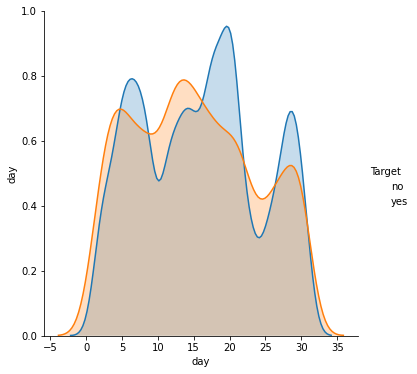

In [25]:
#reviewing Days in detail 
sns.pairplot(myDF[["day","Target"]], hue="Target", size=5)

In [26]:
#Days dont make sence to be a continuous variable. Will group them  3 columns days_1_10, days_11_20, days_21_31 
#myDF['days_1_10']=np.where(myDF['day'])
myDF['day_w_1_10']= np.where(myDF['day']<11,1,0)
myDF['day_w_11_20']= np.where((myDF['day']>10) & (myDF['day']<21),1,0)
myDF['day_w_21_31']= np.where((myDF['day']>20) & (myDF['day']<32),1,0)

myDF.drop(['day'],axis=1,inplace=True)


In [27]:
myDF.dtypes

age                      int64
job                   category
marital               category
education             category
default               category
balance                  int64
housing               category
loan                  category
contact               category
month                 category
duration                 int64
poutcome              category
Target                category
contacted_before      category
previous_contact      category
campaign_3_orless        int32
campaign_3_to_6          int32
campaign_morethan6       int32
day_w_1_10               int32
day_w_11_20              int32
day_w_21_31              int32
dtype: object

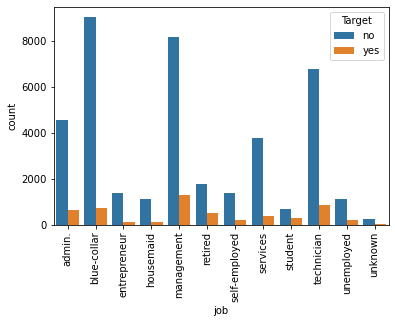

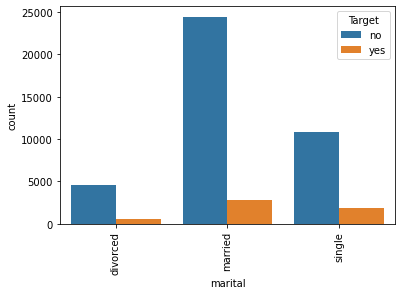

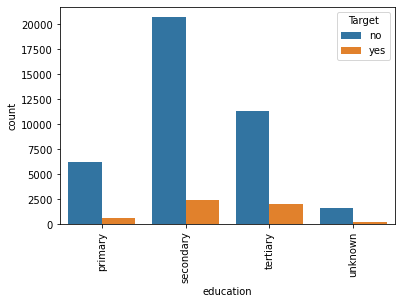

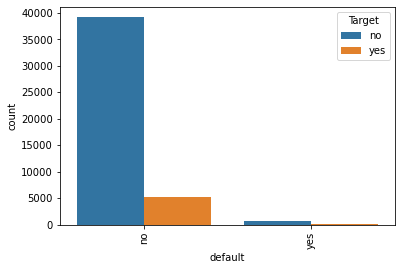

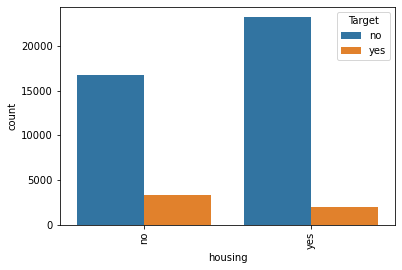

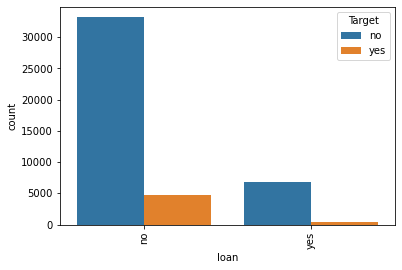

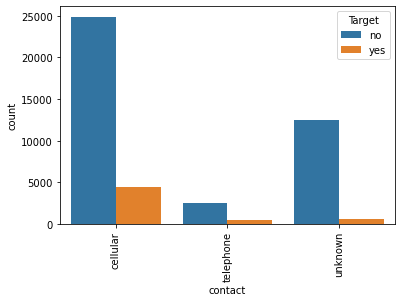

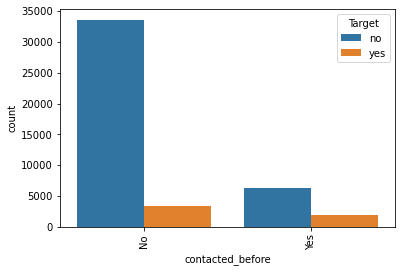

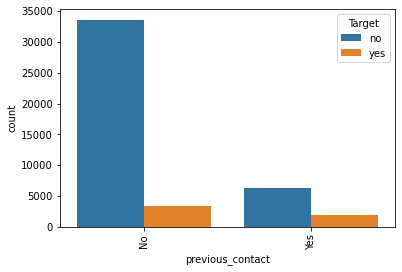

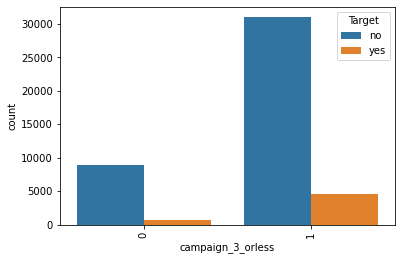

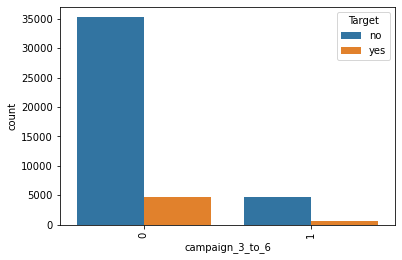

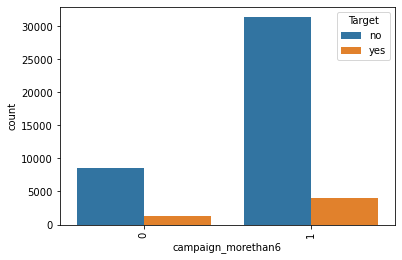

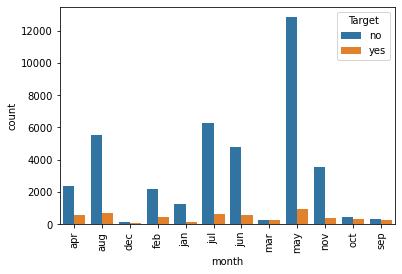

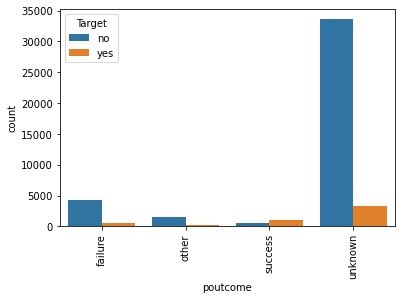

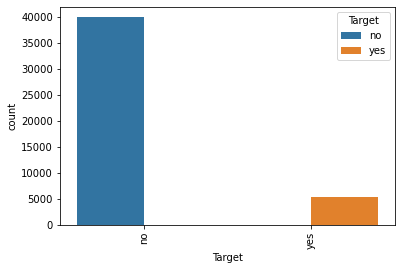

In [28]:
 for i in ['job','marital','education','default','housing','loan','contact','contacted_before','previous_contact','campaign_3_orless','campaign_3_to_6','campaign_morethan6', 'month','poutcome', 'Target']:
    plt.xticks(rotation=90) 
    sns.countplot(myDF[i],hue=myDF['Target'])
    plt.show()

In [29]:
for i in list(myDF.columns[myDF.dtypes=='category']):   # checking value counts of all object type columns
    print(myDF[i].value_counts(normalize=True))
    print()

blue-collar      0.215262
management       0.209179
technician       0.168038
admin.           0.114377
services         0.091882
retired          0.050232
self-employed    0.034926
entrepreneur     0.032891
unemployed       0.028821
housemaid        0.027428
student          0.020748
unknown          0.006215
Name: job, dtype: float64

married     0.601924
single      0.282902
divorced    0.115174
Name: marital, dtype: float64

secondary    0.513205
tertiary     0.294183
primary      0.151537
unknown      0.041075
Name: education, dtype: float64

no     0.981973
yes    0.018027
Name: default, dtype: float64

yes    0.555828
no     0.444172
Name: housing, dtype: float64

no     0.83977
yes    0.16023
Name: loan, dtype: float64

cellular     0.647733
unknown      0.287989
telephone    0.064278
Name: contact, dtype: float64

may    0.304490
jul    0.152511
aug    0.138177
jun    0.118138
nov    0.087812
apr    0.064853
feb    0.058571
jan    0.031033
oct    0.016324
sep    0.012807
mar  

In [30]:
#Dropping poutcome - unknown is 81% of the data i.e. most of the data is uknown
myDF.drop(['poutcome'],axis=1,inplace=True)


In [31]:
#If education is primary, lets assume that the unknown job is blue-collar
myDF.loc[(myDF['job']=='unknown') & (myDF['education']=='primary'),'job']='blue-collar'


In [32]:
myDF.loc[(myDF['age']>90)]

age      job   marital  education default  balance housing loan  \
31233   94  retired  divorced  secondary      no     1234      no   no   
33699   95  retired  divorced    primary      no     2282      no   no   
41663   95  retired   married  secondary      no        0      no   no   
41934   92  retired   married    unknown      no      775      no   no   
42727   92  retired   married    unknown      no      775      no   no   
44262   93  retired   married    unknown      no      775      no   no   
44420   93  retired   married    unknown      no      775      no   no   

         contact month  duration Target contacted_before previous_contact  \
31233   cellular   mar       212     no               No               No   
33699  telephone   apr       207    yes               No               No   
41663  telephone   oct       215     no               No               No   
41934   cellular   oct       313    yes               No               No   
42727   cellular   jan       164    yes              Yes              Yes   
44262   cellular   jul       860    yes              Yes              Yes   
44420   cellular   aug       476    yes              Yes              Yes   

       campaign_3_orless  campaign_3_to_6  campaign_morethan6  day_w_1_10  \
31233                  1                0                   0           1   
33699                  0                0                   1           0   
41663                  1                0                   0           1   
41934                  1                0                   1           0   
42727                  0                0                   1           0   
44262                  1                0                   1           0   
44420                  1                1                   0           1   

       day_w_11_20  day_w_21_31  
31233            0            0  
33699            0            1  
41663            0            0  
41934            0            1  
42727            0            1  
44262            0            1  
44420            0            0

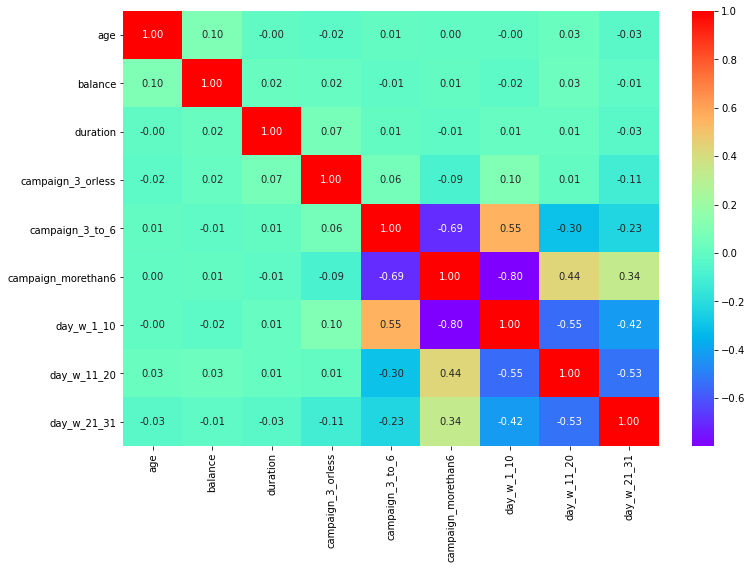

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(myDF.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [34]:
myDF.groupby(["Target"]).mean()

age      balance    duration  campaign_3_orless  \
Target                                                          
no      40.839007  1303.734025  221.179605           0.776258   
yes     41.670070  1804.267915  537.294574           0.865948   

        campaign_3_to_6  campaign_morethan6  day_w_1_10  day_w_11_20  \
Target                                                                 
no             0.116756            0.785476    0.300343     0.409935   
yes            0.118359            0.766875    0.327850     0.382681   

        day_w_21_31  
Target               
no         0.289722  
yes        0.289469

In [35]:
myDF.groupby(["Target"]).median()

age  balance  duration  campaign_3_orless  campaign_3_to_6  \
Target                                                               
no       39      417       164                  1                0   
yes      38      733       426                  1                0   

        campaign_morethan6  day_w_1_10  day_w_11_20  day_w_21_31  
Target                                                            
no                       1           0            0            0  
yes                      1           0            0            0

In [36]:
myDF.dtypes

age                      int64
job                   category
marital               category
education             category
default               category
balance                  int64
housing               category
loan                  category
contact               category
month                 category
duration                 int64
Target                category
contacted_before      category
previous_contact      category
campaign_3_orless        int32
campaign_3_to_6          int32
campaign_morethan6       int32
day_w_1_10               int32
day_w_11_20              int32
day_w_21_31              int32
dtype: object

In [37]:
pd.crosstab(myDF['job'],myDF['Target'],normalize='index')

Target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927323  0.072677
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862430  0.137570
retired        0.771907  0.228093
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.873913  0.126087

In [38]:
pd.crosstab(myDF['marital'],myDF['Target'],normalize='index')

Target          no       yes
marital                     
divorced  0.880545  0.119455
married   0.898762  0.101238
single    0.850508  0.149492

In [39]:
pd.crosstab(myDF['education'],myDF['Target'],normalize='index')

Target           no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849925  0.150075
unknown    0.864297  0.135703

In [40]:
pd.crosstab(myDF['default'],myDF['Target'],normalize='index')

Target         no       yes
default                    
no       0.882036  0.117964
yes      0.936196  0.063804

In [41]:
pd.crosstab(myDF['housing'],myDF['Target'],normalize='index')

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.922997  0.077003

In [42]:
pd.crosstab(myDF['loan'],myDF['Target'],normalize='index')

Target        no       yes
loan                      
no      0.873439  0.126561
yes     0.933186  0.066814

In [43]:
pd.crosstab(myDF['contact'],myDF['Target'],normalize='index')

Target           no       yes
contact                      
cellular   0.850806  0.149194
telephone  0.865795  0.134205
unknown    0.959293  0.040707

In [44]:
pd.crosstab(myDF['month'],myDF['Target'],normalize='index')

Target        no       yes
month                     
apr     0.803206  0.196794
aug     0.889867  0.110133
dec     0.532710  0.467290
feb     0.833459  0.166541
jan     0.898788  0.101212
jul     0.909065  0.090935
jun     0.897772  0.102228
mar     0.480084  0.519916
may     0.932805  0.067195
nov     0.898489  0.101511
oct     0.562331  0.437669
sep     0.535406  0.464594

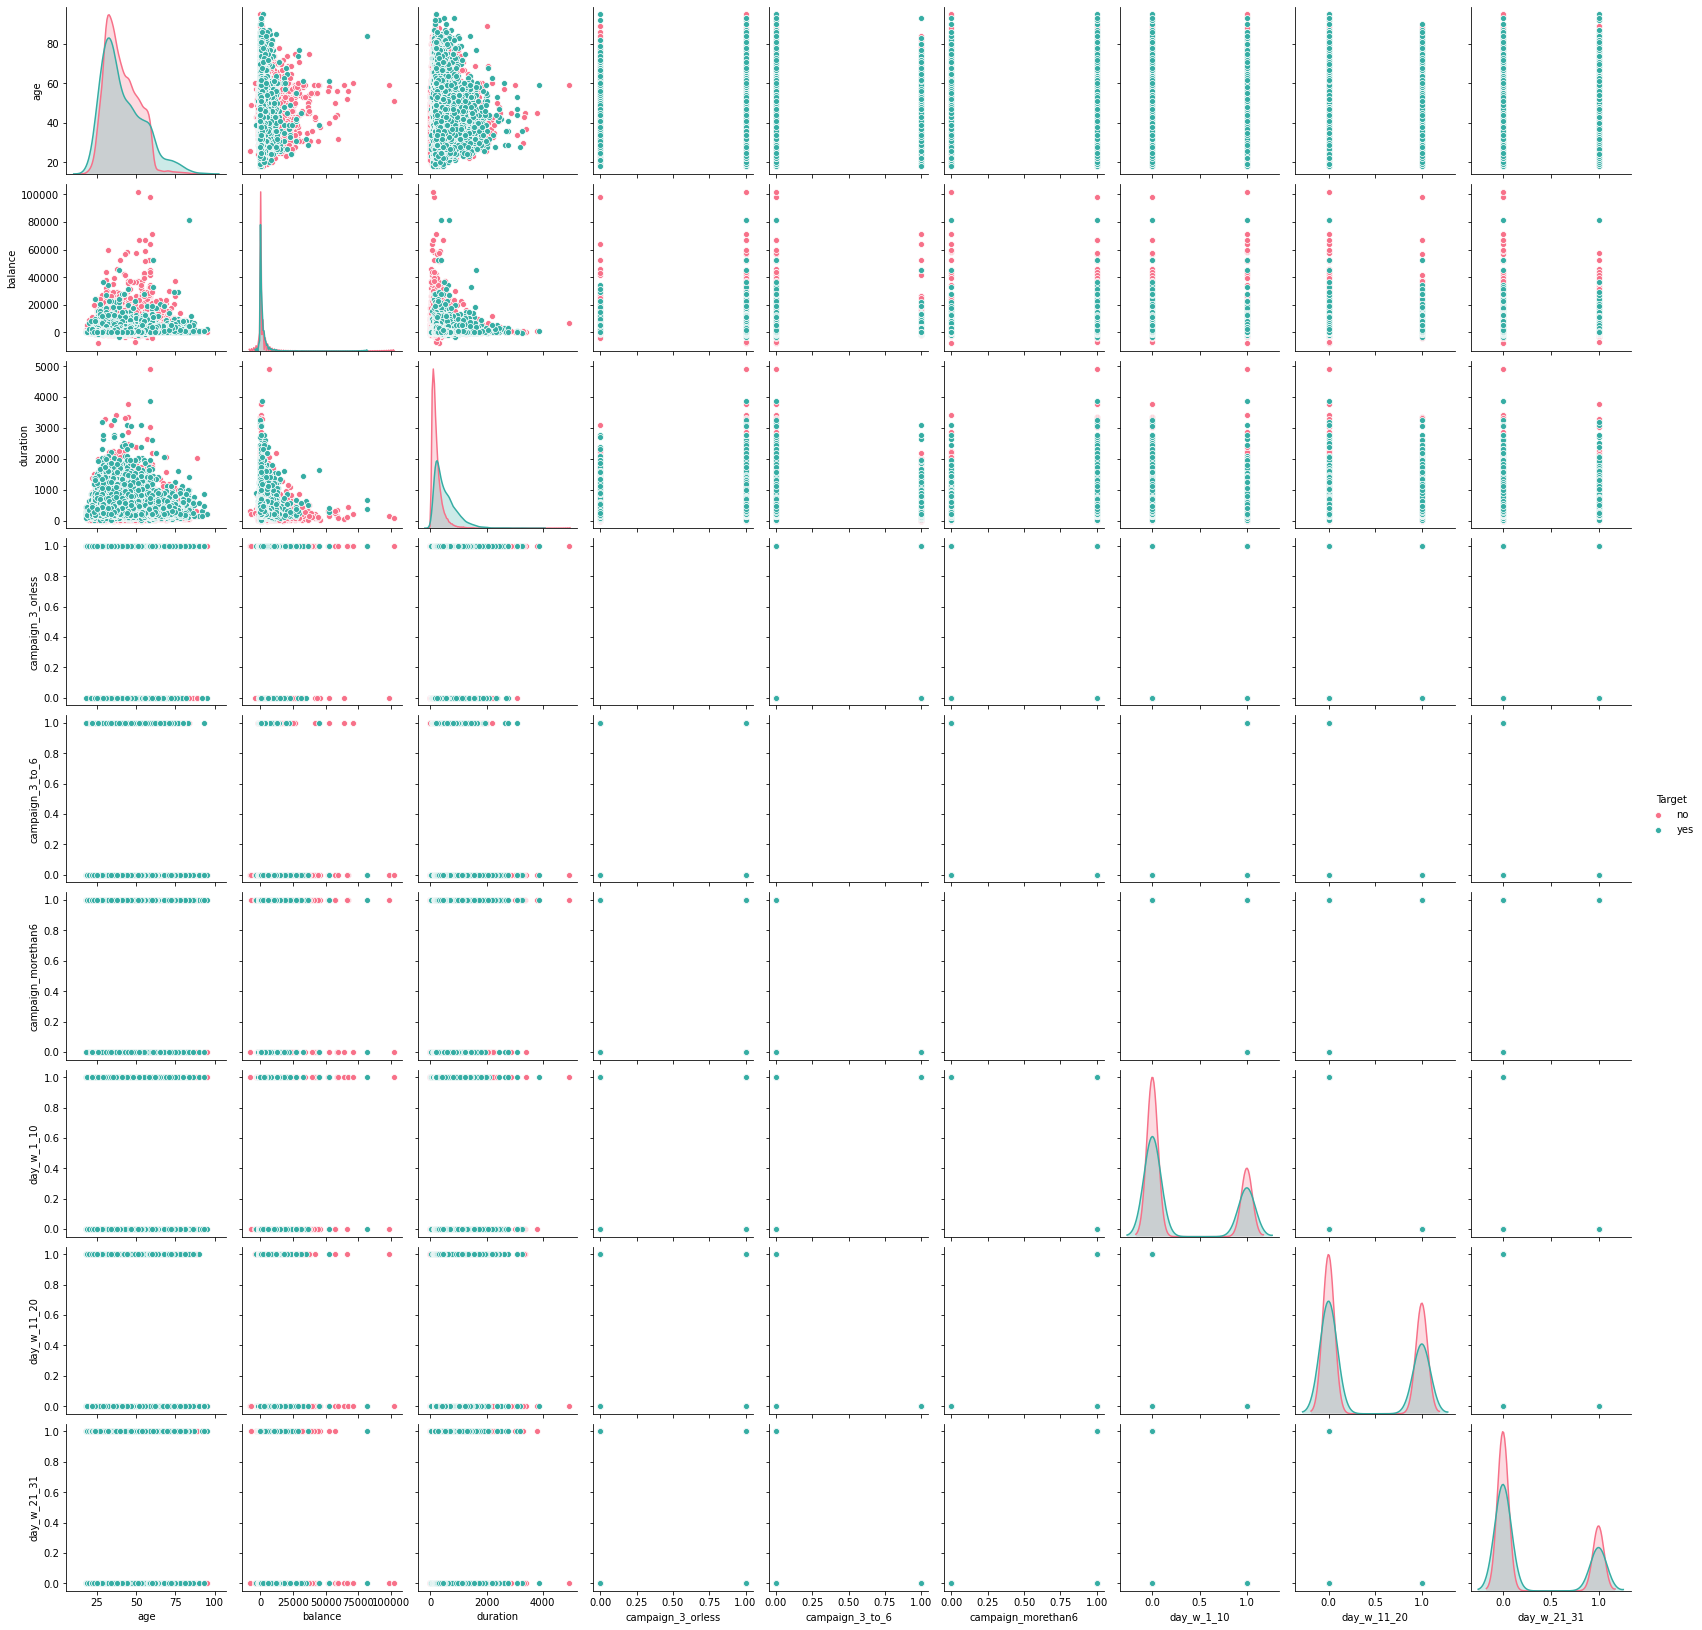

In [45]:
sns.pairplot(myDF, hue="Target", palette="husl");


In [46]:
myDF.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact month  duration Target contacted_before previous_contact  \
0  unknown   may       261     no               No               No   
1  unknown   may       151     no               No               No   
2  unknown   may        76     no               No               No   
3  unknown   may        92     no               No               No   
4  unknown   may       198     no               No               No   

   campaign_3_orless  campaign_3_to_6  campaign_morethan6  day_w_1_10  \
0                  1                1                   0           1   
1                  1                1                   0           1   
2                  1                1                   0           1   
3                  1                1                   0           1   
4                  1                1                   0           1   

   day_w_11_20  day_w_21_31  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0

In [47]:
dict = {'jan' : 'Q1','feb' : 'Q1','mar' : 'Q1', 'apr' : 'Q2','may' : 'Q2','jun' : 'Q2','jul' : 'Q3','aug' : 'Q3','sep' : 'Q3','oct' : 'Q4','nov' : 'Q4','dec' : 'Q4' } 
dict

{'jan': 'Q1',
 'feb': 'Q1',
 'mar': 'Q1',
 'apr': 'Q2',
 'may': 'Q2',
 'jun': 'Q2',
 'jul': 'Q3',
 'aug': 'Q3',
 'sep': 'Q3',
 'oct': 'Q4',
 'nov': 'Q4',
 'dec': 'Q4'}

#### Thought of changing the months to Quarters using myDF.replace({"month":dict},inplace=True). Changed my mind. Since some months are more valuable than others even within a quarter


In [48]:
dict_y={'no':0,'yes':1}
myDF.replace({"Target":dict_y},inplace=True)
myDF.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact month  duration  Target contacted_before previous_contact  \
0  unknown   may       261       0               No               No   
1  unknown   may       151       0               No               No   
2  unknown   may        76       0               No               No   
3  unknown   may        92       0               No               No   
4  unknown   may       198       0               No               No   
5  unknown   may       139       0               No               No   
6  unknown   may       217       0               No               No   
7  unknown   may       380       0               No               No   
8  unknown   may        50       0               No               No   
9  unknown   may        55       0               No               No   

   campaign_3_orless  campaign_3_to_6  campaign_morethan6  day_w_1_10  \
0                  1                1                   0           1   
1                  1                1                   0           1   
2                  1                1                   0           1   
3                  1                1                   0           1   
4                  1                1                   0           1   
5                  1                1                   0           1   
6                  1                1                   0           1   
7                  1                1                   0           1   
8                  1                1                   0           1   
9                  1                1                   0           1   

   day_w_11_20  day_w_21_31  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  
5            0            0  
6            0            0  
7            0            0  
8            0            0  
9            0            0

In [49]:
pd.crosstab(myDF['month'],myDF['Target'],normalize='index')

Target         0         1
month                     
apr     0.803206  0.196794
aug     0.889867  0.110133
dec     0.532710  0.467290
feb     0.833459  0.166541
jan     0.898788  0.101212
jul     0.909065  0.090935
jun     0.897772  0.102228
mar     0.480084  0.519916
may     0.932805  0.067195
nov     0.898489  0.101511
oct     0.562331  0.437669
sep     0.535406  0.464594

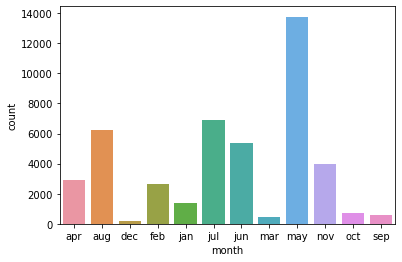

In [50]:
sns.countplot(myDF["month"])
plt.show()

In [51]:
#Before creating dummies, we need to drop day_w_21_31 (or one of the other 2 "day columns") since the data is implicitly in the other 2 day columns
#Same for 
myDF.drop(['day_w_21_31'],axis=1,inplace=True)
myDF.drop(['campaign_morethan6'],axis=1,inplace=True)


## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

In [52]:
## Define X and Y variables
X = myDF.drop('Target', axis=1)
Y = myDF['Target']

In [53]:
X.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact month  duration contacted_before previous_contact  \
0  unknown   may       261               No               No   
1  unknown   may       151               No               No   
2  unknown   may        76               No               No   
3  unknown   may        92               No               No   
4  unknown   may       198               No               No   

   campaign_3_orless  campaign_3_to_6  day_w_1_10  day_w_11_20  
0                  1                1           1            0  
1                  1                1           1            0  
2                  1                1           1            0  
3                  1                1           1            0  
4                  1                1           1            0

In [54]:
X = pd.get_dummies(X, drop_first=True)

In [55]:
X.dtypes

age                     int64
balance                 int64
duration                int64
campaign_3_orless       int32
campaign_3_to_6         int32
day_w_1_10              int32
day_w_11_20             int32
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
marital_married         uint8
marital_single          uint8
education_secondary     uint8
education_tertiary      uint8
education_unknown       uint8
default_yes             uint8
housing_yes             uint8
loan_yes                uint8
contact_telephone       uint8
contact_unknown         uint8
month_aug               uint8
month_dec               uint8
month_feb               uint8
month_jan               uint8
month_jul               uint8
month_jun 

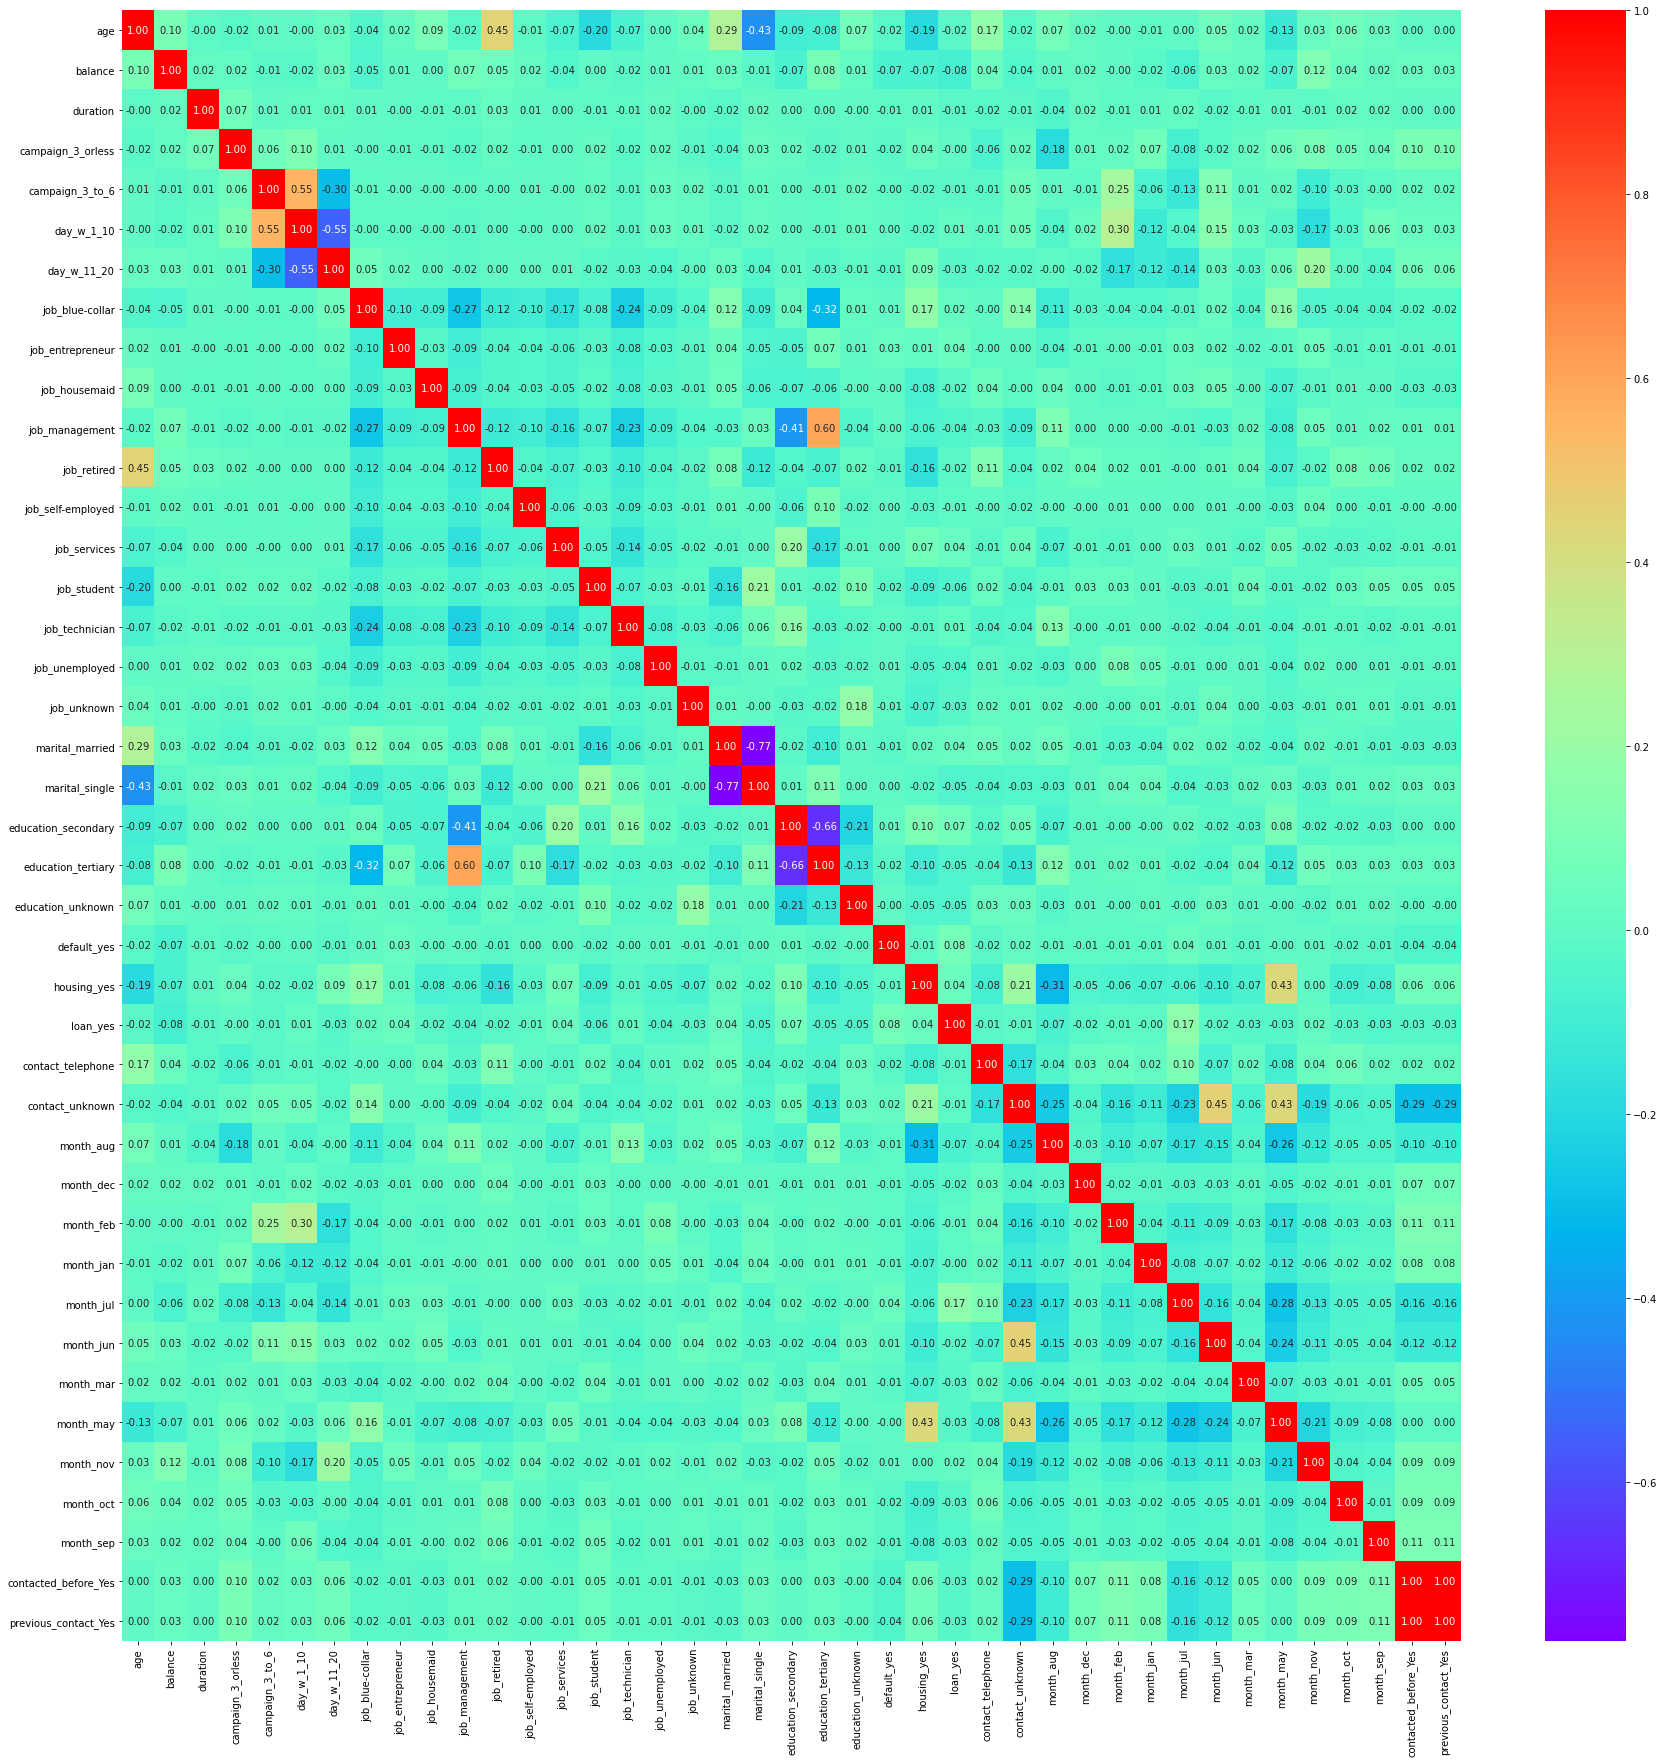

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [57]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [58]:
##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=1)

In [59]:
y_predict = logreg.predict(X_test)       

In [60]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    


In [61]:
#Create Dataframe for results
myResults =pd.DataFrame(columns=['Algorithm','Training Accuracy','Testing Accuracy','Recall','Precision','F1 Score','ROC AUC Score'])
myResults



Empty DataFrame
Columns: [Algorithm, Training Accuracy, Testing Accuracy, Recall, Precision, F1 Score, ROC AUC Score]
Index: []

In [62]:
#Create function for Appending to Dataframe

def populate_result(algorithm,training_accuracy,testing_accuracy,recall,precision,f1,roc_auc):
    global myResults
    myResults=myResults.append({'Algorithm':algorithm,'Training Accuracy':training_accuracy,'Testing Accuracy':testing_accuracy,'Recall':recall,'Precision':precision,'F1 Score':f1,'ROC AUC Score':roc_auc},ignore_index=True)




Confusion Matrix


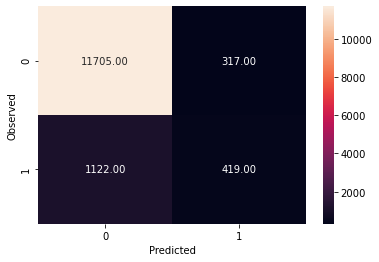

None


Algorithm  Training Accuracy  Testing Accuracy  Recall  \
0  Logistic Regression               0.89              0.89    0.27   

   Precision  F1 Score  ROC AUC Score  
0       0.57      0.37           0.62

In [63]:
training_accuracy=logreg.score(X_train,y_train)
testing_accuracy=logreg.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Logistic Regression', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)
myResults.round(decimals=2)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=2)

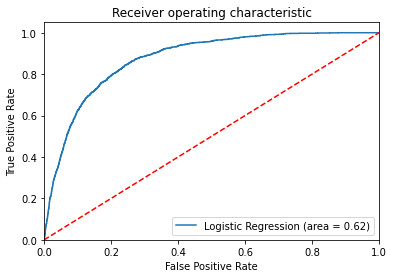

In [64]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

Col  Coeff
24           housing_yes   1.03
27       contact_unknown   0.96
40  previous_contact_Yes   0.68
39  contacted_before_Yes   0.68
32             month_jul   0.63
35             month_may   0.58
25              loan_yes   0.56
18       marital_married   0.56
11           job_retired   0.55
28             month_aug   0.52
7        job_blue-collar   0.49
37             month_oct   0.40
36             month_nov   0.36
34             month_mar   0.36
21    education_tertiary   0.35
38             month_sep   0.33
19        marital_single   0.31
31             month_jan   0.29
6            day_w_11_20   0.28
20   education_secondary   0.26
15        job_technician   0.24
10        job_management   0.24
13          job_services   0.20
8       job_entrepreneur   0.17
4        campaign_3_to_6   0.13
5             day_w_1_10   0.13
12     job_self-employed   0.12
9          job_housemaid   0.12
14           job_student   0.10
29             month_dec   0.10
3      campaign_3_orless   0.09
23           default_yes   0.08
33             month_jun   0.07
26     contact_telephone   0.06
16        job_unemployed   0.05
30             month_feb   0.04
22     education_unknown   0.02
0                    age   0.01
17           job_unknown   0.01
2               duration   0.00
1                balance   0.00

## Build Decision Tree Model

In [66]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

1.0
0.8644105286441053
Confusion Matrix


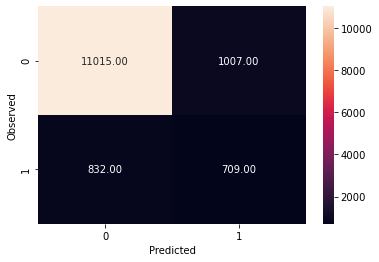

None


Algorithm  Training Accuracy  Testing Accuracy  Recall  \
0  Logistic Regression             0.8935            0.8939  0.2719   
1        Decision Tree             1.0000            0.8644  0.4601   

   Precision  F1 Score  ROC AUC Score  
0     0.5693    0.3680         0.6228  
1     0.4132    0.4354         0.6882

In [67]:
#scoring the decision tree
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

y_predict = dTree.predict(X_test)

training_accuracy=dTree.score(X_train,y_train)
testing_accuracy=dTree.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Decision Tree', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)


print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)


In [68]:
train_char_label = ['No', 'Yes']
Term_Deposit_File = open('Term_Deposit.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Term_Deposit_File, feature_names = list(X_train), class_names = list(train_char_label))
Term_Deposit_File.close()

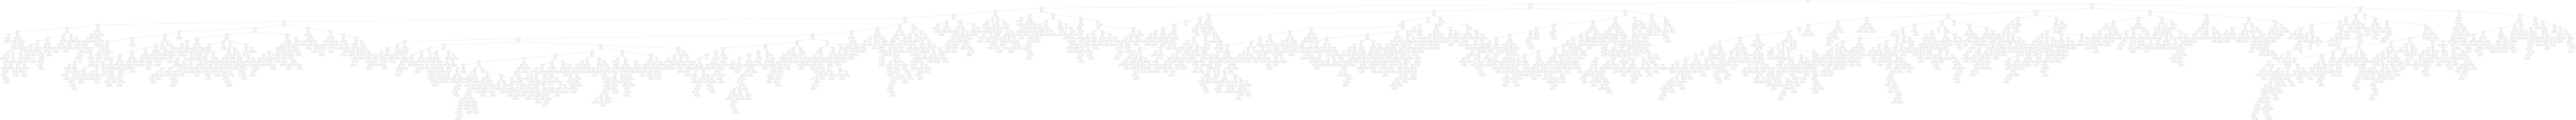

In [69]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Term_Deposit.dot -o Term_Deposit.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Term_Deposit.png"))

    

In [70]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8887414288874143
0.8913219789132197


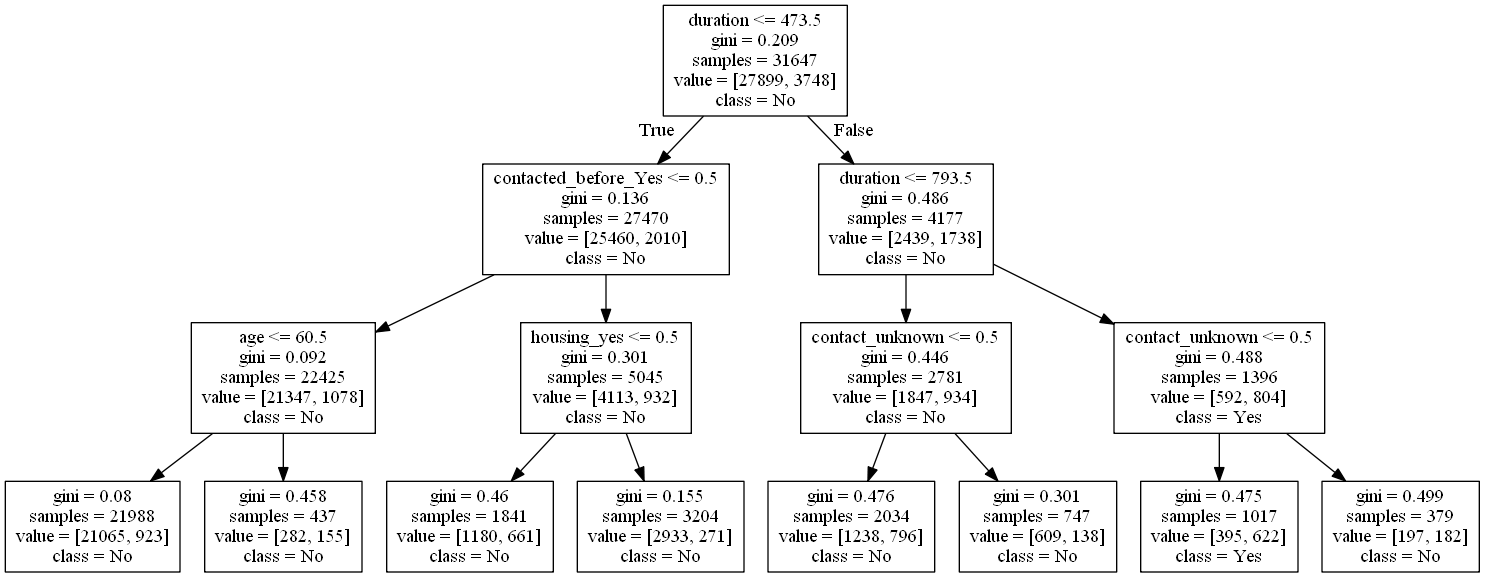

In [71]:
train_char_label = ['No', 'Yes']
Term_Deposit_FileR = open('Term_DepositR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Term_Deposit_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Term_Deposit_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Term_DepositR.dot -o Term_DepositR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Term_DepositR.png"))

In [72]:
## Feature Importance or Coefficients 
fi2 = pd.DataFrame()
fi2['Col'] = X_train.columns
#fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi2['Coeff'] = np.round(abs(dTreeR.feature_importances_),2)
fi2.sort_values(by='Coeff',ascending=False)

Col  Coeff
2               duration   0.67
24           housing_yes   0.12
39  contacted_before_Yes   0.11
0                    age   0.06
27       contact_unknown   0.04
30             month_feb   0.00
23           default_yes   0.00
25              loan_yes   0.00
26     contact_telephone   0.00
28             month_aug   0.00
29             month_dec   0.00
32             month_jul   0.00
31             month_jan   0.00
21    education_tertiary   0.00
33             month_jun   0.00
34             month_mar   0.00
35             month_may   0.00
36             month_nov   0.00
37             month_oct   0.00
38             month_sep   0.00
22     education_unknown   0.00
20   education_secondary   0.00
1                balance   0.00
10        job_management   0.00
3      campaign_3_orless   0.00
4        campaign_3_to_6   0.00
5             day_w_1_10   0.00
6            day_w_11_20   0.00
7        job_blue-collar   0.00
8       job_entrepreneur   0.00
9          job_housemaid   0.00
11           job_retired   0.00
19        marital_single   0.00
12     job_self-employed   0.00
13          job_services   0.00
14           job_student   0.00
15        job_technician   0.00
16        job_unemployed   0.00
17           job_unknown   0.00
18       marital_married   0.00
40  previous_contact_Yes   0.00

Confusion Matrix


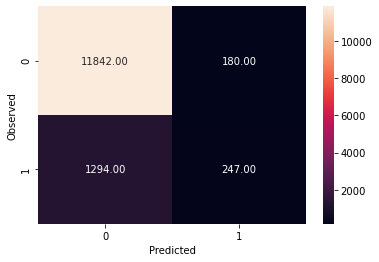

None


Algorithm  Training Accuracy  Testing Accuracy  Recall  \
0           Logistic Regression             0.8935            0.8939  0.2719   
1                 Decision Tree             1.0000            0.8644  0.4601   
2  Decision Tree -Gini-Depth =3             0.8887            0.8913  0.1603   

   Precision  F1 Score  ROC AUC Score  
0     0.5693    0.3680         0.6228  
1     0.4132    0.4354         0.6882  
2     0.5785    0.2510         0.5727

In [73]:
#print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

training_accuracy=dTreeR.score(X_train,y_train)
testing_accuracy=dTreeR.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Decision Tree -Gini-Depth =3', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)


print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)





0.8962618889626189
0.893828798938288
Confusion Matrix


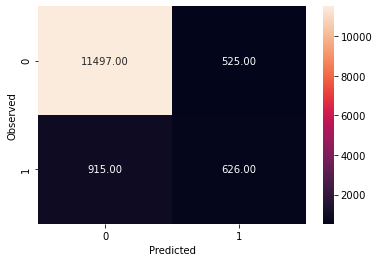

None


Algorithm  Training Accuracy  Testing Accuracy  Recall  \
0           Logistic Regression             0.8935            0.8939  0.2719   
1                 Decision Tree             1.0000            0.8644  0.4601   
2  Decision Tree -Gini-Depth =3             0.8887            0.8913  0.1603   
3  Decision Tree -Gini-Depth =5             0.8963            0.8938  0.4062   

   Precision  F1 Score  ROC AUC Score  
0     0.5693    0.3680         0.6228  
1     0.4132    0.4354         0.6882  
2     0.5785    0.2510         0.5727  
3     0.5439    0.4651         0.6813

In [74]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))


y_predict = dTreeR.predict(X_test)

training_accuracy=dTreeR.score(X_train,y_train)
testing_accuracy=dTreeR.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Decision Tree -Gini-Depth =5', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)


print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)



0.8933548203621197
0.8933126889331269
Confusion Matrix


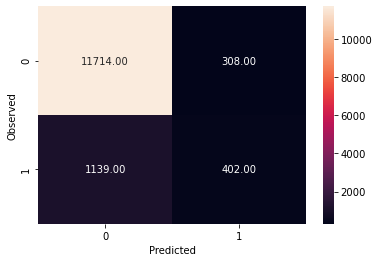

None


Algorithm  Training Accuracy  Testing Accuracy  \
0              Logistic Regression             0.8935            0.8939   
1                    Decision Tree             1.0000            0.8644   
2     Decision Tree -Gini-Depth =3             0.8887            0.8913   
3     Decision Tree -Gini-Depth =5             0.8963            0.8938   
4  Decision Tree -Entropy-Depth =5             0.8934            0.8933   

   Recall  Precision  F1 Score  ROC AUC Score  
0  0.2719     0.5693    0.3680         0.6228  
1  0.4601     0.4132    0.4354         0.6882  
2  0.1603     0.5785    0.2510         0.5727  
3  0.4062     0.5439    0.4651         0.6813  
4  0.2609     0.5662    0.3572         0.6176

In [75]:
dTreeRE = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1)
dTreeRE.fit(X_train, y_train)
print(dTreeRE.score(X_train, y_train))
print(dTreeRE.score(X_test, y_test))


y_predict = dTreeRE.predict(X_test)

training_accuracy=dTreeRE.score(X_train,y_train)
testing_accuracy=dTreeRE.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Decision Tree -Entropy-Depth =5', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)


print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)



## Ensemble Learning - Bagging

In [76]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Confusion Matrix


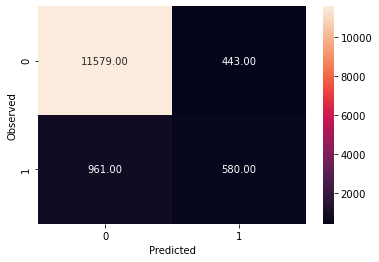

None


Algorithm  Training Accuracy  Testing Accuracy  \
0              Logistic Regression             0.8935            0.8939   
1                    Decision Tree             1.0000            0.8644   
2     Decision Tree -Gini-Depth =3             0.8887            0.8913   
3     Decision Tree -Gini-Depth =5             0.8963            0.8938   
4  Decision Tree -Entropy-Depth =5             0.8934            0.8933   
5                          Bagging             0.9003            0.8965   

   Recall  Precision  F1 Score  ROC AUC Score  
0  0.2719     0.5693    0.3680         0.6228  
1  0.4601     0.4132    0.4354         0.6882  
2  0.1603     0.5785    0.2510         0.5727  
3  0.4062     0.5439    0.4651         0.6813  
4  0.2609     0.5662    0.3572         0.6176  
5  0.3764     0.5670    0.4524         0.6698

In [77]:
y_predict = bgcl.predict(X_test)
training_accuracy=bgcl.score(X_train,y_train)
testing_accuracy=bgcl.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Bagging', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)



## Ensemble Learning - AdaBoosting

In [78]:


from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

Confusion Matrix


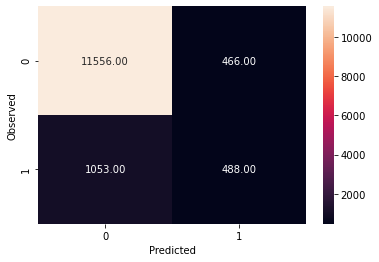

None


Algorithm  Training Accuracy  Testing Accuracy  \
0              Logistic Regression             0.8935            0.8939   
1                    Decision Tree             1.0000            0.8644   
2     Decision Tree -Gini-Depth =3             0.8887            0.8913   
3     Decision Tree -Gini-Depth =5             0.8963            0.8938   
4  Decision Tree -Entropy-Depth =5             0.8934            0.8933   
5                          Bagging             0.9003            0.8965   
6                      AdaBoosting             0.8872            0.8880   

   Recall  Precision  F1 Score  ROC AUC Score  
0  0.2719     0.5693    0.3680         0.6228  
1  0.4601     0.4132    0.4354         0.6882  
2  0.1603     0.5785    0.2510         0.5727  
3  0.4062     0.5439    0.4651         0.6813  
4  0.2609     0.5662    0.3572         0.6176  
5  0.3764     0.5670    0.4524         0.6698  
6  0.3167     0.5115    0.3912         0.6390

In [79]:
y_predict = abcl.predict(X_test)
training_accuracy=abcl.score(X_train,y_train)
testing_accuracy=abcl.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('AdaBoosting', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)



## Ensemble Learning - GradientBoost

Confusion Matrix


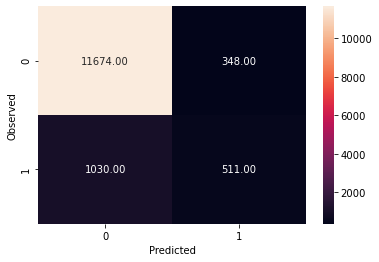

None


Algorithm  Training Accuracy  Testing Accuracy  \
0              Logistic Regression             0.8935            0.8939   
1                    Decision Tree             1.0000            0.8644   
2     Decision Tree -Gini-Depth =3             0.8887            0.8913   
3     Decision Tree -Gini-Depth =5             0.8963            0.8938   
4  Decision Tree -Entropy-Depth =5             0.8934            0.8933   
5                          Bagging             0.9003            0.8965   
6                      AdaBoosting             0.8872            0.8880   
7                Gradient Boosting             0.9001            0.8984   

   Recall  Precision  F1 Score  ROC AUC Score  
0  0.2719     0.5693    0.3680         0.6228  
1  0.4601     0.4132    0.4354         0.6882  
2  0.1603     0.5785    0.2510         0.5727  
3  0.4062     0.5439    0.4651         0.6813  
4  0.2609     0.5662    0.3572         0.6176  
5  0.3764     0.5670    0.4524         0.6698  
6  0.3167     0.5115    0.3912         0.6390  
7  0.3316     0.5949    0.4258         0.6513

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
                
training_accuracy=gbcl.score(X_train,y_train)
testing_accuracy=gbcl.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Gradient Boosting', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)

## Ensemble RandomForest Classifier

Confusion Matrix


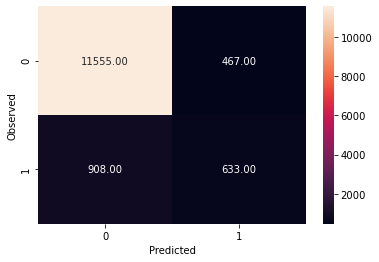

None


Algorithm  Training Accuracy  Testing Accuracy  \
0              Logistic Regression             0.8935            0.8939   
1                    Decision Tree             1.0000            0.8644   
2     Decision Tree -Gini-Depth =3             0.8887            0.8913   
3     Decision Tree -Gini-Depth =5             0.8963            0.8938   
4  Decision Tree -Entropy-Depth =5             0.8934            0.8933   
5                          Bagging             0.9003            0.8965   
6                      AdaBoosting             0.8872            0.8880   
7                Gradient Boosting             0.9001            0.8984   
8                    Random Forest             0.9998            0.8986   

   Recall  Precision  F1 Score  ROC AUC Score  
0  0.2719     0.5693    0.3680         0.6228  
1  0.4601     0.4132    0.4354         0.6882  
2  0.1603     0.5785    0.2510         0.5727  
3  0.4062     0.5439    0.4651         0.6813  
4  0.2609     0.5662    0.3572         0.6176  
5  0.3764     0.5670    0.4524         0.6698  
6  0.3167     0.5115    0.3912         0.6390  
7  0.3316     0.5949    0.4258         0.6513  
8  0.4108     0.5755    0.4794         0.6860

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

y_predict = rfcl.predict(X_test)
                
training_accuracy=rfcl.score(X_train,y_train)
testing_accuracy=rfcl.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('Random Forest', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

myResults.round(decimals=4)

##  XGBoost Classifier

Confusion Matrix


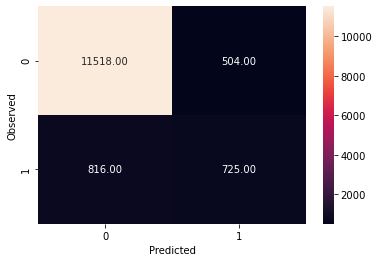

None


In [82]:
from xgboost import XGBClassifier

bst = XGBClassifier()
bst=bst.fit(X_train, y_train ,)

y_predict = bst.predict(X_test)
                
training_accuracy=rfcl.score(X_train,y_train)
testing_accuracy=rfcl.score(X_test, y_test)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
roc_auc=roc_auc_score(y_test,y_predict)
populate_result('XGBoost', training_accuracy,testing_accuracy,recall,precision,f1,roc_auc)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))




In [83]:
## Feature Importance or Coefficients 
fi3 = pd.DataFrame()
fi3['Col'] = X_train.columns
fi3['Coeff'] = np.round(abs(bst.feature_importances_),2)
fi3.sort_values(by='Coeff',ascending=False)

Col  Coeff
27       contact_unknown   0.08
24           housing_yes   0.07
34             month_mar   0.06
2               duration   0.05
39  contacted_before_Yes   0.05
37             month_oct   0.05
33             month_jun   0.05
38             month_sep   0.04
32             month_jul   0.04
14           job_student   0.03
28             month_aug   0.03
29             month_dec   0.03
30             month_feb   0.03
31             month_jan   0.03
25              loan_yes   0.03
5             day_w_1_10   0.03
35             month_may   0.02
36             month_nov   0.02
7        job_blue-collar   0.02
6            day_w_11_20   0.02
21    education_tertiary   0.02
0                    age   0.02
26     contact_telephone   0.01
20   education_secondary   0.01
23           default_yes   0.01
12     job_self-employed   0.01
3      campaign_3_orless   0.01
4        campaign_3_to_6   0.01
8       job_entrepreneur   0.01
9          job_housemaid   0.01
10        job_management   0.01
11           job_retired   0.01
13          job_services   0.01
22     education_unknown   0.01
15        job_technician   0.01
16        job_unemployed   0.01
17           job_unknown   0.01
18       marital_married   0.01
19        marital_single   0.01
1                balance   0.01
40  previous_contact_Yes   0.00

In [84]:
myResults.round(decimals=4)

Algorithm  Training Accuracy  Testing Accuracy  \
0              Logistic Regression             0.8935            0.8939   
1                    Decision Tree             1.0000            0.8644   
2     Decision Tree -Gini-Depth =3             0.8887            0.8913   
3     Decision Tree -Gini-Depth =5             0.8963            0.8938   
4  Decision Tree -Entropy-Depth =5             0.8934            0.8933   
5                          Bagging             0.9003            0.8965   
6                      AdaBoosting             0.8872            0.8880   
7                Gradient Boosting             0.9001            0.8984   
8                    Random Forest             0.9998            0.8986   
9                          XGBoost             0.9998            0.8986   

   Recall  Precision  F1 Score  ROC AUC Score  
0  0.2719     0.5693    0.3680         0.6228  
1  0.4601     0.4132    0.4354         0.6882  
2  0.1603     0.5785    0.2510         0.5727  
3  0.4062     0.5439    0.4651         0.6813  
4  0.2609     0.5662    0.3572         0.6176  
5  0.3764     0.5670    0.4524         0.6698  
6  0.3167     0.5115    0.3912         0.6390  
7  0.3316     0.5949    0.4258         0.6513  
8  0.4108     0.5755    0.4794         0.6860  
9  0.4705     0.5899    0.5235         0.7143

## Conclusion 

All of the models other than the unpruned decision tree gave similar Testing accuracy. However, out of all of the methods, XGBoost did give the best overall results when Recall, Precision, F1 score and ROC AUC Score are taken into account. 

I reviewed the importance of coeffeciants under the Logistic Regression , Regularized Decision Tree (depth 3) and  XG boost. What was common was that we should target candidates which housing loans and who were previously contacted. 

What is interesting is that all of the processes above had several coeffeciants which other algoritms deemed to not as significant. 

